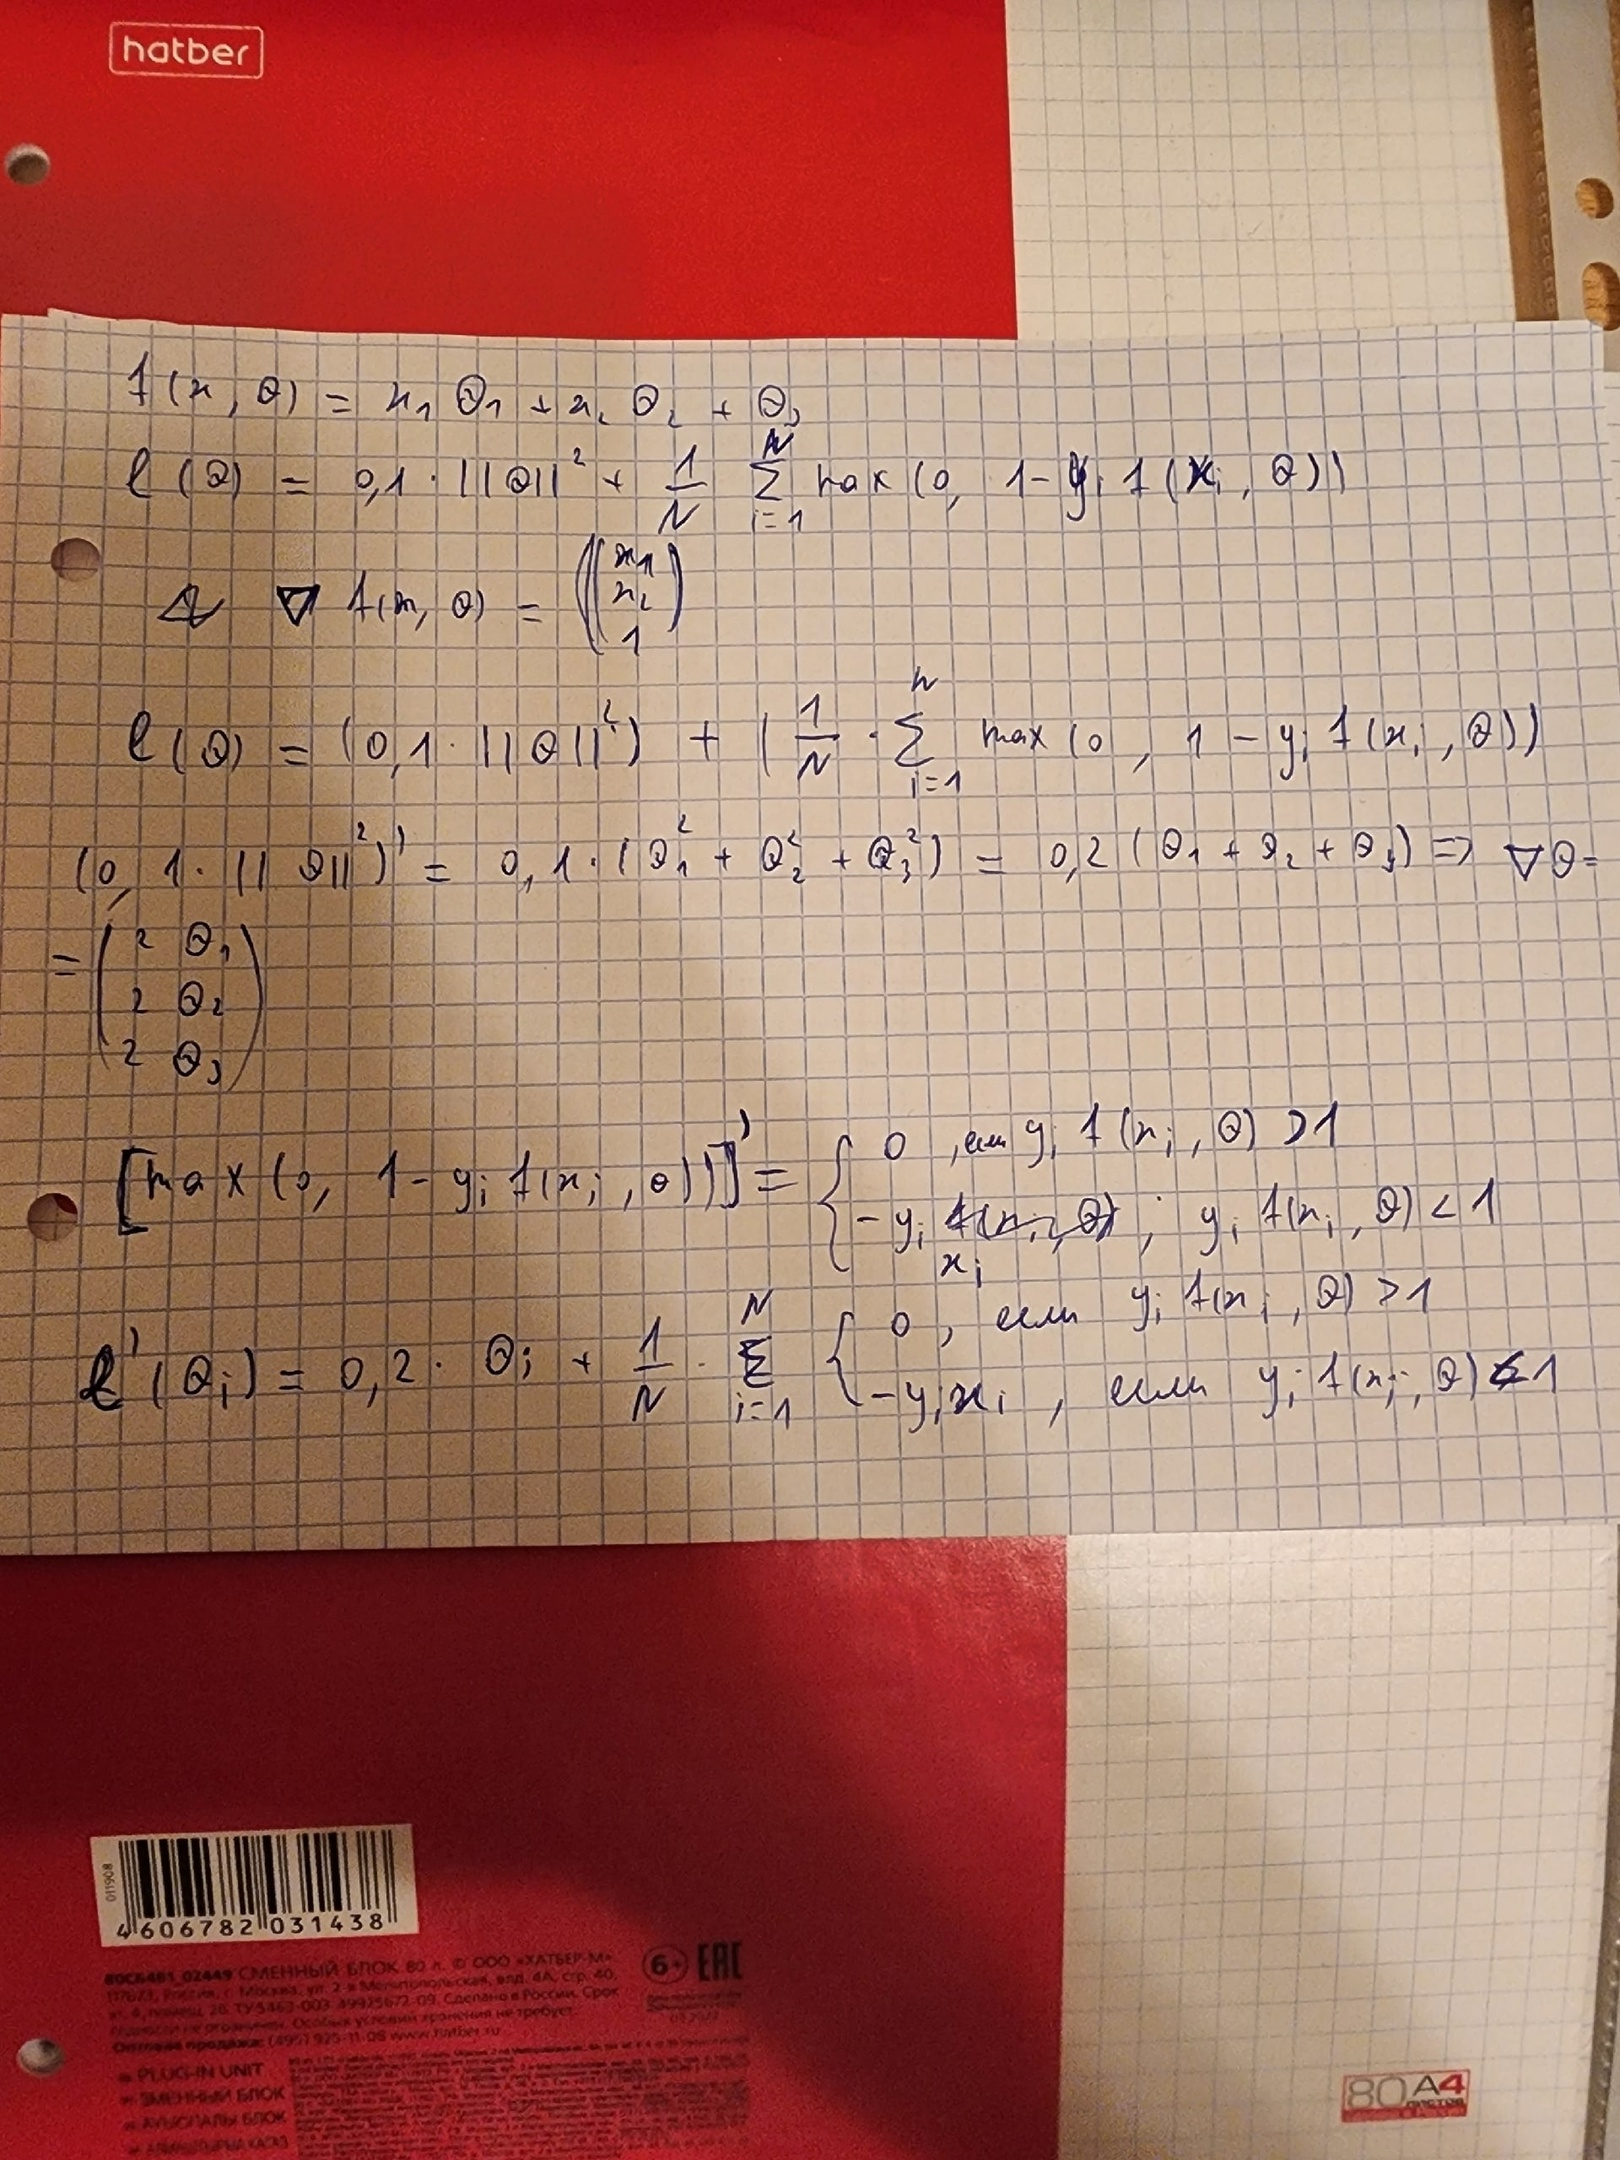

# Домашняя работа по регуляризации и оптимизации

Ниже приводится корпус данных с двумя метками: 1 и -1. К данным применяется линейная модель классификации:

$f(x, \theta) = x_1 \theta_1 + x_2 \theta_2 + \theta_3.$

Предлагается подобрать параметры $\theta$ минимизируя следующую функцию ошибки:

$\mathcal{L}(\theta) = 0.1 \|\theta\|^2 + \frac{1}{N}\sum\limits_{i=1}^N \max(0, 1 - y_i f(x_i, \theta)).$

Для оптимизации предлагается использовать метод градиентного спуска с 1000 шагами размера $0.1$ из начальной точки $(1, 1, 0)$.

In [57]:
import numpy as np
import yaml

In [58]:
X = np.array([
    [0, 1],
    [1, 1],
    [1, 0],
    [-0.5, 0.5],
    [0, -0.5]
])

y = np.array([1, 1, 1, -1, -1])

theta0 = np.array([1.0, 1.0, 0.0])

lr = 0.1

def f(X, theta):
    return X[0] * theta0[0] + X[1] * theta0[1] + theta0[2]

def loss(X, y, theta):
    theta = np.asarray(theta)
    norm = (theta ** 2).sum()
    summa = 0
    for i in range(len(X)):
        summa += max(0, 1 - y[i] * f(X[i], theta))
    #deltas = y * f(X, theta)
    return 0.1 * norm + (1/5) * summa

print("Prediction:", [f(X[i], theta0) for i in range(len(X))])
print("Loss:", loss(X, y, theta0))

Prediction: [1.0, 2.0, 1.0, 0.0, -0.5]
Loss: 0.5


In [59]:
def step(X, y, tet):
    grad = np.zeros(3)
    for i in range(len(tet)):
        grad[i] = 0.1 * 2 * tet[i]
        for j in range(len(X)):
            summa = 0
            if (y[j] * f(X[j], tet) < 1):
                if (i == 2):
                    summa = summa + y[j]
                else:
                    summa = summa + y[j] * X[j][i]
            grad[i] -= (1/5) * summa
    return grad
for i in range(1000):
  theta0 -= lr * step(X, y, theta0)


In [60]:
print("Prediction:", [f(X[i], theta0) for i in range(len(X))])
print("Loss:", loss(X, y, theta0))

with open("submission.yaml", "w") as fp:
    yaml.safe_dump({"tasks": [{"task1": {"answer": theta0.tolist()}}]}, fp)

Prediction: [0.7521849388064437, 2.004369876840096, 1.0043698768744427, -0.37390753019320955, -0.747815061142037]
Loss: 0.4881564363223614
